<a href="https://colab.research.google.com/github/riponalmamun/WITHOUT-BACKGROUND-Sandfly/blob/main/WITHOUT_BACKGROUND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

zip_path = '/content/Genitalia_Balanced_DATASET.zip'
extract_dir = '/content/Genitalia_Balanced_DATASET'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents
for root, dirs, files in os.walk(extract_dir):
    print(f"📁 Folder: {root}")
    for file in files:
        print(f"  📄 {file}")
    break  # Remove this if you want to list all subfolders too

📁 Folder: /content/Genitalia_Balanced_DATASET


🧾 Classes found: ['Ph_alexandri_female', 'Ph_alexandri_male', 'Ph_papatasi_female', 'Ph_papatasi_male', 'Ph_sergenti_female', 'Ph_sergenti_male']

📊 Image count per class:
  Ph_alexandri_female: 243 images
  Ph_alexandri_male: 243 images
  Ph_papatasi_female: 243 images
  Ph_papatasi_male: 243 images
  Ph_sergenti_female: 243 images
  Ph_sergenti_male: 243 images


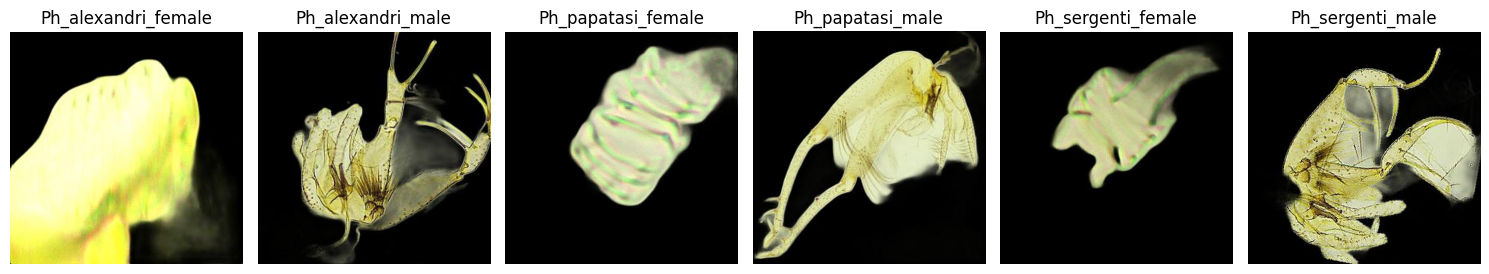

In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set dataset directory
data_dir = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET'

# List class folders
classes = sorted(os.listdir(data_dir))
print("🧾 Classes found:", classes)

# Count images per class
class_counts = {}
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[cls] = count

print("\n📊 Image count per class:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count} images")

# Show a sample image from each class
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
for i, cls in enumerate(classes):
    cls_path = os.path.join(data_dir, cls)
    img_files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if img_files:
        img = mpimg.imread(os.path.join(cls_path, img_files[0]))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(cls)

plt.tight_layout()
plt.show()


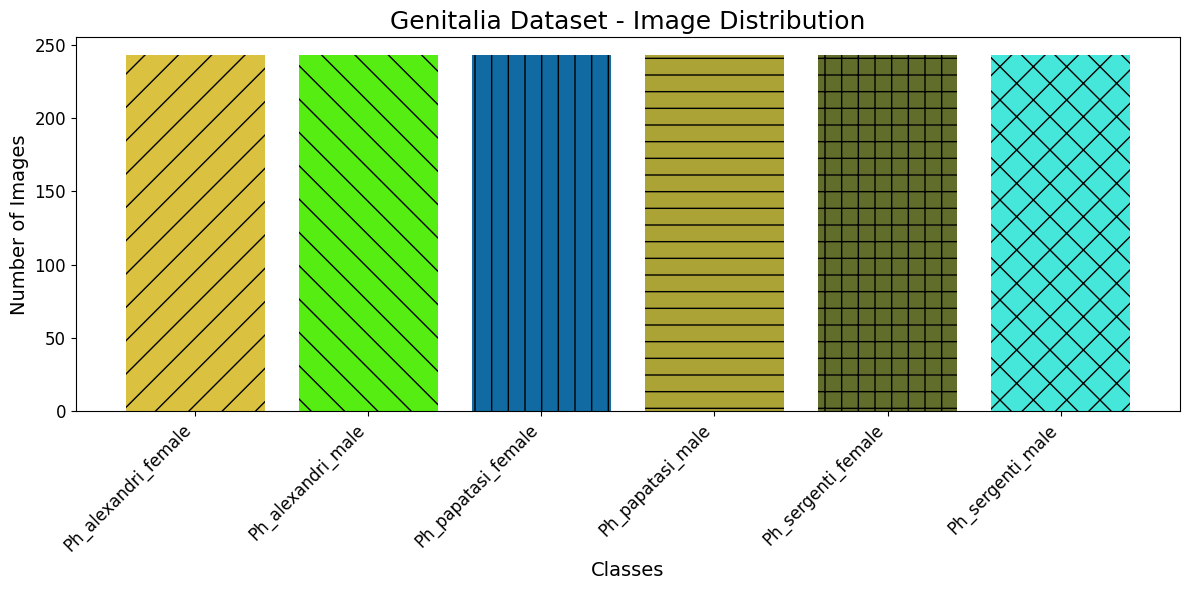


📊 Total images: 1458
📂 Image count per class:

              Class  Number of Images
Ph_alexandri_female               243
  Ph_alexandri_male               243
 Ph_papatasi_female               243
   Ph_papatasi_male               243
 Ph_sergenti_female               243
   Ph_sergenti_male               243


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import defaultdict

# Define dataset path
genitalia_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET'  # ✅ Adjust if needed

# Count images per class
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
class_counts = defaultdict(int)
total_images = 0

for class_folder in os.listdir(genitalia_path):
    class_path = os.path.join(genitalia_path, class_folder)
    if os.path.isdir(class_path):
        image_files = [
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ]
        count = len(image_files)
        class_counts[class_folder] = count
        total_images += count

# Prepare data for plotting
categories = sorted(class_counts.keys())
image_counts = [class_counts[cls] for cls in categories]

# Plotting
plt.figure(figsize=(12, 6))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"] * (len(categories) // 8 + 1)
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]
bars = plt.bar(categories, image_counts, color=colors)

for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("Genitalia Dataset - Image Distribution", fontsize=18)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
save_path = os.path.join(genitalia_path, "Genitalia_Image_Distribution.png")
plt.savefig(save_path, format="png", dpi=600)
plt.show()

# Table output
df = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(f"\n📊 Total images: {total_images}")
print("📂 Image count per class:\n")
print(df.to_string(index=False))


In [ ]:
import shutil
import os
import random

# Define dataset source path
dataset_source = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET"

# Define target paths for train, validation, and test sets
train_path = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/train"
val_path = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/val"
test_path = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test"

# Create directories for train, validation, and test sets if they don't exist
for path in [train_path, val_path, test_path]:
    os.makedirs(path, exist_ok=True)

# Define the split ratios for train, validation, and test
split_ratios = {"train": 0.8, "val": 0.05, "test": 0.15}

# Iterate through each class folder (assuming class-wise folder structure in the dataset)
for class_folder in os.listdir(dataset_source):
    class_path = os.path.join(dataset_source, class_folder)

    # Process only directories (class folders)
    if os.path.isdir(class_path):
        # List only image files within the class folder
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        # Shuffle the image filenames to randomize the split
        random.shuffle(images)

        # Calculate the number of images for each split
        train_split = int(len(images) * split_ratios["train"])
        val_split = int(len(images) * split_ratios["val"])
        test_split = len(images) - train_split - val_split

        # Split and copy images into respective directories
        for i, img in enumerate(images):
            src_img_path = os.path.join(class_path, img)

            # Determine the target folder based on the split
            if i < train_split:
                dest_folder = os.path.join(train_path, class_folder)
            elif i < train_split + val_split:
                dest_folder = os.path.join(val_path, class_folder)
            else:
                dest_folder = os.path.join(test_path, class_folder)

            # Ensure the target folder exists
            os.makedirs(dest_folder, exist_ok=True)

            # Define the full path for the destination image (with the image name included)
            dest_img_path = os.path.join(dest_folder, img)

            # Copy the image to the appropriate folder
            shutil.copy(src_img_path, dest_img_path)

print("✅ Dataset successfully split into train/val/test (80%/5%/15%)!")


✅ Dataset successfully split into train/val/test (80%/5%/15%)!


In [ ]:
import os
from PIL import Image

dataset_dir = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET'
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        try:
            img = Image.open(os.path.join(root, file))
            img.verify()  # Verify if it's a valid image
        except (IOError, SyntaxError) as e:
            print(f"Invalid image file: {file} in {root}")
def process_images(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        # Further image processing here
    except (IOError, SyntaxError) as e:
        print(f"Error loading image {file_path}: {e}")


Invalid image file: aug_171.jpg in /content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/train/Ph_alexandri_male
Invalid image file: aug_171.jpg in /content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/Ph_alexandri_male


In [ ]:
import os
from PIL import Image

def check_and_remove_corrupted_images(directory):
    invalid_images = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Verifies if the file is a valid image
            except (IOError, SyntaxError) as e:
                print(f"Skipping invalid image: {file_path}")
                invalid_images.append(file_path)
                os.remove(file_path)  # Optionally, delete the corrupted image
    return invalid_images

# Apply this function to your dataset
check_and_remove_corrupted_images(train_path)
check_and_remove_corrupted_images(val_path)
check_and_remove_corrupted_images(test_path)


Skipping invalid image: /content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/train/Ph_alexandri_male/aug_171.jpg


[]

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

# Custom function to safely load an image
def safe_load_img_from_directory(directory, target_size):
    valid_files = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = load_img(file_path, target_size=target_size)
                valid_files.append(file_path)
            except Exception as e:
                print(f"Skipping invalid image: {file_path}")
    return valid_files

# Example: Use this function to load valid files
valid_train_images = safe_load_img_from_directory(train_path, IMG_SIZE)
valid_val_images = safe_load_img_from_directory(val_path, IMG_SIZE)
valid_test_images = safe_load_img_from_directory(test_path, IMG_SIZE)

# Use the list of valid files for your data generators


Found 1163 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 222 images belonging to 6 classes.

🚀 Training EfficientNetV2S_CBAM for 20 epochs


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4571 - loss: 1.5297
Epoch 1: val_loss improved from inf to 0.67352, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.4590 - loss: 1.5254 - val_accuracy: 0.8056 - val_loss: 0.6735 - learning_rate: 1.0000e-04
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.8350 - loss: 0.5393
Epoch 2: val_loss improved from 0.67352 to 0.22831, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 321ms/step - accuracy: 0.8349 - loss: 0.5389 - val_accuracy: 0.9583 - val_loss: 0.2283 - learning_rate: 1.0000e-04
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8823 - loss: 0.3508
Epoch 3: val_loss improved from 0.22831 to 0.13800, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 313ms/step - accuracy: 0.8824 - loss: 0.3506 - val_accuracy: 0.9444 - val_loss: 0.1380 - learning_rate: 1.0000e-04
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9214 - loss: 0.2421
Epoch 4: val_loss improved from 0.13800 to 0.12235, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - accuracy: 0.9214 - loss: 0.2420 - val_accuracy: 0.9583 - val_loss: 0.1223 - learning_rate: 1.0000e-04
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9492 - loss: 0.1702
Epoch 5: val_loss improved from 0.12235 to 0.09433, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 319ms/step - accuracy: 0.9493 - loss: 0.1700 - val_accuracy: 0.9861 - val_loss: 0.0943 - learning_rate: 1.0000e-04
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9714 - loss: 0.1239
Epoch 6: val_loss improved from 0.09433 to 0.08000, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 319ms/step - accuracy: 0.9712 - loss: 0.1243 - val_accuracy: 0.9861 - val_loss: 0.0800 - learning_rate: 1.0000e-04
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.9685 - loss: 0.1053
Epoch 7: val_loss did not improve from 0.08000
73/73 ━━━━━━━━━━━━━━━━━━━━ 22s 297ms/step - accuracy: 0.9685 - loss: 0.1054 - val_accuracy: 0.9861 - val_loss: 0.0953 - learning_rate: 1.0000e-04
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.9792 - loss: 0.0957
Epoch 8: val_loss did not improve from 0.08000
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step - accuracy: 0.9791 - loss: 0.0959 - val_accuracy: 0.9722 - val_loss: 0.0975 - learning_rate: 1.0000e-04
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9746 - loss: 0.0835
Epoch 9: val_loss improved from 0.08000 to 0.05679, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 325ms/step - accuracy: 0.9746 - loss: 0.0835 - val_accuracy: 0.9861 - val_loss: 0.0568 - learning_rate: 1.0000e-04
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.9770 - loss: 0.0733
Epoch 10: val_loss did not improve from 0.05679
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 296ms/step - accuracy: 0.9771 - loss: 0.0732 - val_accuracy: 0.9722 - val_loss: 0.0861 - learning_rate: 1.0000e-04
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.9817 - loss: 0.0740
Epoch 11: val_loss did not improve from 0.05679
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - accuracy: 0.9817 - loss: 0.0740 - val_accuracy: 0.9861 - val_loss: 0.0737 - learning_rate: 1.0000e-04
Epoch 12/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.9757 - loss: 0.1091
Epoch 12: val_loss improved from 0.05679 to 0.04767, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 323ms/step - accuracy: 0.9758 - loss: 0.1087 - val_accuracy: 0.9861 - val_loss: 0.0477 - learning_rate: 1.0000e-04
Epoch 13/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.9810 - loss: 0.0730
Epoch 13: val_loss did not improve from 0.04767
73/73 ━━━━━━━━━━━━━━━━━━━━ 22s 294ms/step - accuracy: 0.9810 - loss: 0.0730 - val_accuracy: 0.9722 - val_loss: 0.1241 - learning_rate: 1.0000e-04
Epoch 14/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9821 - loss: 0.0769
Epoch 14: val_loss did not improve from 0.04767
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 279ms/step - accuracy: 0.9821 - loss: 0.0768 - val_accuracy: 0.9861 - val_loss: 0.0604 - learning_rate: 1.0000e-04
Epoch 15/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.9953 - loss: 0.0324
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 15: val_loss did not improve from 0.04767
73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 316ms/step - accuracy: 0.9952 - loss: 0.0326 - v

73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 315ms/step - accuracy: 0.9993 - loss: 0.0272 - val_accuracy: 0.9861 - val_loss: 0.0443 - learning_rate: 2.5000e-05
✅ Evaluating EfficientNetV2S_CBAM
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 637ms/step - accuracy: 0.9991 - loss: 0.0215
EfficientNetV2S_CBAM Test Accuracy: 99.55%


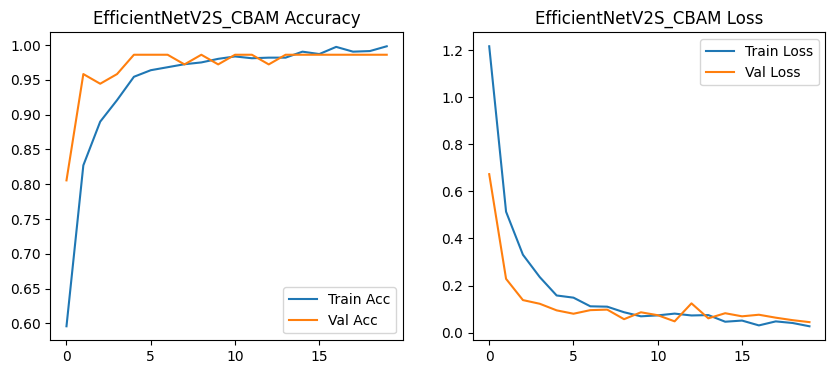

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 834ms/step
📊 Classification Report for EfficientNetV2S_CBAM
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      1.00      1.00        37
  Ph_alexandri_male       0.97      1.00      0.99        37
 Ph_papatasi_female       1.00      1.00      1.00        37
   Ph_papatasi_male       1.00      1.00      1.00        37
 Ph_sergenti_female       1.00      1.00      1.00        37
   Ph_sergenti_male       1.00      0.97      0.99        37

           accuracy                           1.00       222
          macro avg       1.00      1.00      1.00       222
       weighted avg       1.00      1.00      1.00       222



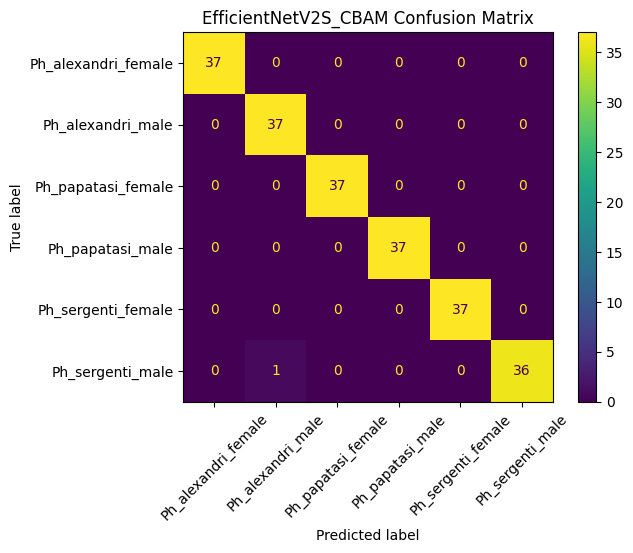


🚀 Training DenseNet201_SE for 20 epochs
Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6024 - loss: 1.1102
Epoch 1: val_loss did not improve from 0.04430
73/73 ━━━━━━━━━━━━━━━━━━━━ 786s 5s/step - accuracy: 0.6043 - loss: 1.1052 - val_accuracy: 0.7361 - val_loss: 0.6426 - learning_rate: 1.0000e-04
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.9067 - loss: 0.3298
Epoch 2: val_loss did not improve from 0.04430
73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 314ms/step - accuracy: 0.9066 - loss: 0.3295 - val_accuracy: 0.9167 - val_loss: 0.2343 - learning_rate: 1.0000e-04
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.9441 - loss: 0.1899
Epoch 3: val_loss did not improve from 0.04430
73/73 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - accuracy: 0.9441 - loss: 0.1899 - val_accuracy: 0.7639 - val_loss: 0.6586 - learning_rate: 1.0000e-04
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.9479 - loss: 0.1594
Epoch 4: val_loss did not improve from 0.

73/73 ━━━━━━━━━━━━━━━━━━━━ 32s 439ms/step - accuracy: 0.9986 - loss: 0.0173 - val_accuracy: 0.9861 - val_loss: 0.0216 - learning_rate: 2.5000e-05
Epoch 15/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.9987 - loss: 0.0169
Epoch 15: val_loss did not improve from 0.02160
73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 311ms/step - accuracy: 0.9987 - loss: 0.0169 - val_accuracy: 0.9861 - val_loss: 0.0278 - learning_rate: 2.5000e-05
Epoch 16/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.9974 - loss: 0.0198
Epoch 16: val_loss did not improve from 0.02160
73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 330ms/step - accuracy: 0.9974 - loss: 0.0198 - val_accuracy: 0.9861 - val_loss: 0.0345 - learning_rate: 2.5000e-05
Epoch 17/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.9977 - loss: 0.0202
Epoch 17: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.

Epoch 17: val_loss did not improve from 0.02160
73/73 ━━━━━━━━━━━━━━━━━━━━ 26s 352ms/step - accuracy: 0.9977 - loss: 0.0202 - v

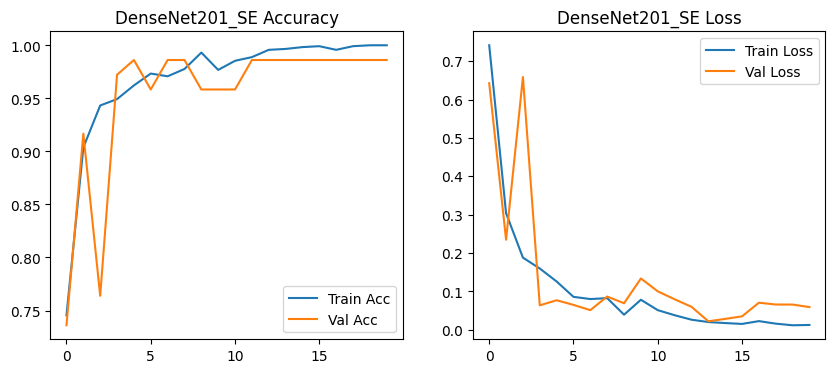

14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step
📊 Classification Report for DenseNet201_SE
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      1.00      1.00        37
  Ph_alexandri_male       0.97      0.97      0.97        37
 Ph_papatasi_female       1.00      0.97      0.99        37
   Ph_papatasi_male       1.00      1.00      1.00        37
 Ph_sergenti_female       0.97      1.00      0.99        37
   Ph_sergenti_male       0.97      0.97      0.97        37

           accuracy                           0.99       222
          macro avg       0.99      0.99      0.99       222
       weighted avg       0.99      0.99      0.99       222



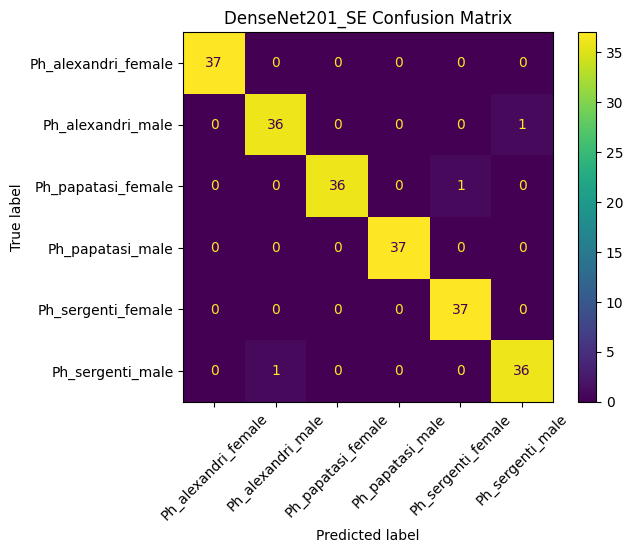


🚀 Training CustomCNN_CBAM for 20 epochs
Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.1920 - loss: 1.8718
Epoch 1: val_loss did not improve from 0.02160
73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 416ms/step - accuracy: 0.1915 - loss: 1.8713 - val_accuracy: 0.1667 - val_loss: 1.7981 - learning_rate: 0.0010
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.1669 - loss: 1.7960
Epoch 2: val_loss did not improve from 0.02160
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 247ms/step - accuracy: 0.1668 - loss: 1.7960 - val_accuracy: 0.1667 - val_loss: 1.7931 - learning_rate: 0.0010
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.1542 - loss: 1.7928
Epoch 3: val_loss did not improve from 0.02160
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 225ms/step - accuracy: 0.1542 - loss: 1.7928 - val_accuracy: 0.1667 - val_loss: 1.7921 - learning_rate: 0.0010
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.1509 - loss: 1.7923
Epoch 4: val_loss did not improve from 0.02160
7

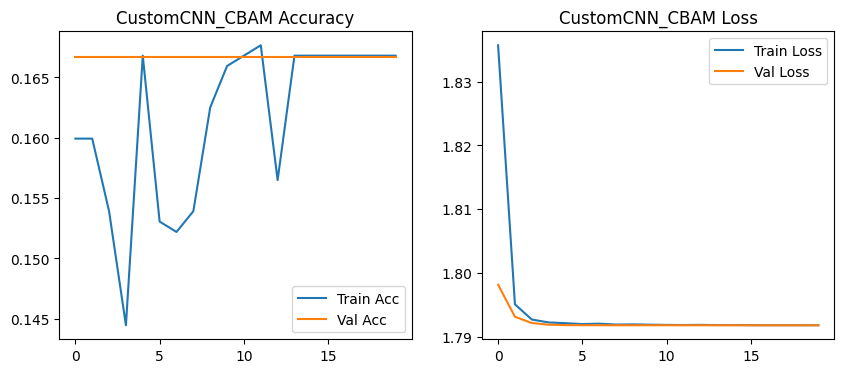

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step
📊 Classification Report for CustomCNN_CBAM
                     precision    recall  f1-score   support

Ph_alexandri_female       0.17      1.00      0.29        37
  Ph_alexandri_male       0.00      0.00      0.00        37
 Ph_papatasi_female       0.00      0.00      0.00        37
   Ph_papatasi_male       0.00      0.00      0.00        37
 Ph_sergenti_female       0.00      0.00      0.00        37
   Ph_sergenti_male       0.00      0.00      0.00        37

           accuracy                           0.17       222
          macro avg       0.03      0.17      0.05       222
       weighted avg       0.03      0.17      0.05       222



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


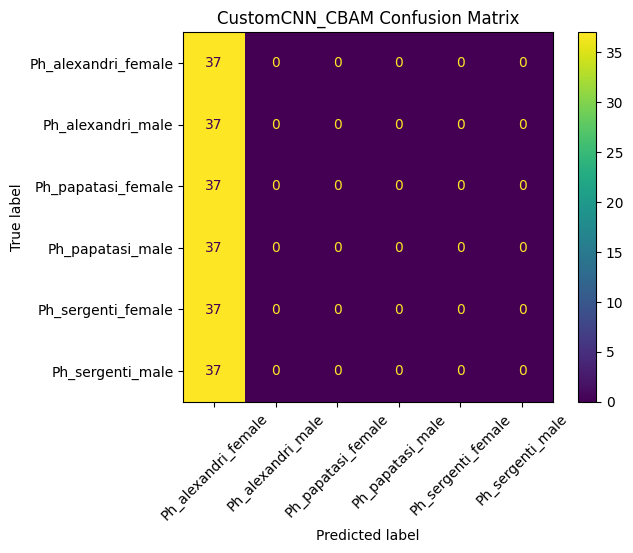


🚀 Training ResNet50 for 20 epochs
Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.5192 - loss: 1.2329
Epoch 1: val_loss did not improve from 0.02160
73/73 ━━━━━━━━━━━━━━━━━━━━ 118s 751ms/step - accuracy: 0.5214 - loss: 1.2275 - val_accuracy: 0.1667 - val_loss: 2.6303 - learning_rate: 1.0000e-04
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8322 - loss: 0.4546
Epoch 2: val_loss did not improve from 0.02160
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 283ms/step - accuracy: 0.8325 - loss: 0.4540 - val_accuracy: 0.1528 - val_loss: 2.1369 - learning_rate: 1.0000e-04
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8686 - loss: 0.3802
Epoch 3: val_loss did not improve from 0.02160
73/73 ━━━━━━━━━━━━━━━━━━━━ 42s 298ms/step - accuracy: 0.8689 - loss: 0.3795 - val_accuracy: 0.1389 - val_loss: 2.0104 - learning_rate: 1.0000e-04
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.9389 - loss: 0.1968
Epoch 4: val_loss did not improve from 0.

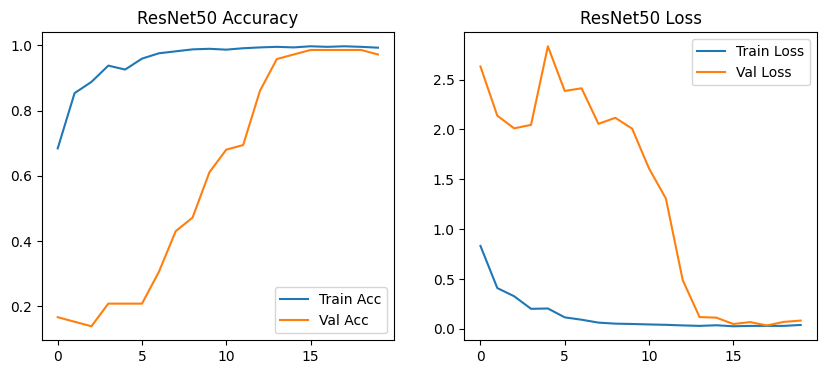

14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 413ms/step
📊 Classification Report for ResNet50
                     precision    recall  f1-score   support

Ph_alexandri_female       0.97      0.97      0.97        37
  Ph_alexandri_male       0.88      1.00      0.94        37
 Ph_papatasi_female       0.97      0.97      0.97        37
   Ph_papatasi_male       1.00      1.00      1.00        37
 Ph_sergenti_female       1.00      1.00      1.00        37
   Ph_sergenti_male       1.00      0.86      0.93        37

           accuracy                           0.97       222
          macro avg       0.97      0.97      0.97       222
       weighted avg       0.97      0.97      0.97       222



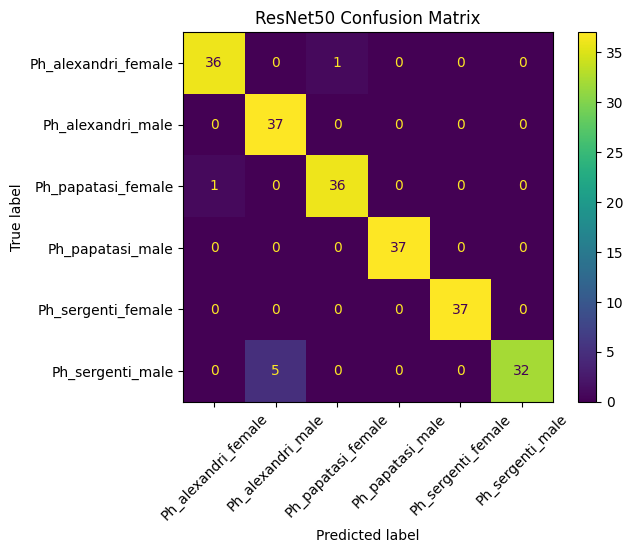


🤝 Evaluating Ensemble Model (Average Fusion)
Ensemble Test Accuracy: 99.10%
📊 Classification Report for Ensemble
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      1.00      1.00        37
  Ph_alexandri_male       0.95      1.00      0.97        37
 Ph_papatasi_female       1.00      1.00      1.00        37
   Ph_papatasi_male       1.00      1.00      1.00        37
 Ph_sergenti_female       1.00      1.00      1.00        37
   Ph_sergenti_male       1.00      0.95      0.97        37

           accuracy                           0.99       222
          macro avg       0.99      0.99      0.99       222
       weighted avg       0.99      0.99      0.99       222



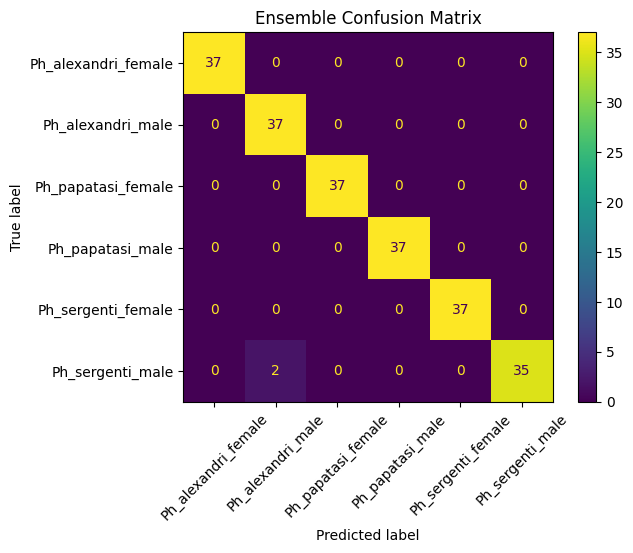

In [ ]:
# --- Install dependencies ---
!pip install tensorflow matplotlib scikit-learn

# --- Imports ---
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import (Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Multiply,
                                     Conv2D, Add, Concatenate, Input, MaxPooling2D, Lambda)
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetV2S, DenseNet201, ResNet50
from tensorflow.keras import backend as K
from PIL import Image
import io

# --- Dataset paths ---
dataset_source = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET"
train_path = f"{dataset_source}/train"
val_path = f"{dataset_source}/val"
test_path = f"{dataset_source}/test"

# --- Image parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Reduced batch size for memory efficiency

# --- Data generators ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = val_test_datagen.flow_from_directory(val_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_gen = val_test_datagen.flow_from_directory(test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# --- Global config ---
input_shape = (224, 224, 3)
num_classes = train_gen.num_classes

# --- Attention modules ---
def se_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se_shape = (1, 1, filters)
    se = GlobalAveragePooling2D()(input_tensor)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    return Multiply()([input_tensor, se])

def cbam_block(input_tensor, ratio=16):
    channel = K.int_shape(input_tensor)[-1]
    avg_pool = GlobalAveragePooling2D()(input_tensor)
    max_pool = GlobalMaxPooling2D()(input_tensor)
    shared_dense = Dense(channel // ratio, activation='relu')
    avg_dense = shared_dense(avg_pool)
    max_dense = shared_dense(max_pool)
    channel_attention = Add()([avg_dense, max_dense])
    channel_attention = Dense(channel, activation='sigmoid')(channel_attention)
    channel_attention = Reshape((1, 1, channel))(channel_attention)
    channel_refined = Multiply()([input_tensor, channel_attention])

    avg_pool = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(channel_refined)
    max_pool = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(channel_refined)
    concat = Concatenate(axis=-1)([avg_pool, max_pool])
    spatial_attention = Conv2D(1, (7, 7), padding='same', activation='sigmoid')(concat)
    refined = Multiply()([channel_refined, spatial_attention])
    return refined

# --- Model builders ---
def build_model(base_model_func, attention_func=None, name="Model"):
    base_model = base_model_func(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = True

    x = base_model.output
    if attention_func:
        x = attention_func(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    x = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)

    model = Model(inputs=base_model.input, outputs=x, name=name)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_custom_cnn_cbam():
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(inputs)
    x = cbam_block(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.3)(x)

    x = Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = cbam_block(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.3)(x)

    x = Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = cbam_block(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)

    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)
    model = Model(inputs, outputs, name="CustomCNN_CBAM")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- Callbacks ---
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)  # Save best model
]

# --- Models to train ---
models = {
    "EfficientNetV2S_CBAM": build_model(EfficientNetV2S, cbam_block, "EffNetV2S_CBAM"),
    "DenseNet201_SE": build_model(DenseNet201, se_block, "DenseNet201_SE"),
    "CustomCNN_CBAM": build_custom_cnn_cbam(),
    "ResNet50": build_model(ResNet50, None, "ResNet50")
}

# --- Training and evaluation ---
history_dict = {}
model_predictions = {}
model_results = {}

# Function to check and skip invalid images
def safe_load_img(file_path):
    try:
        img = Image.open(file_path)
        img.verify()  # Verifies if the file is a valid image
        return img
    except (IOError, SyntaxError) as e:
        print(f"Skipping invalid image: {file_path}")
        return None

for name, model in models.items():
    print(f"\n🚀 Training {name} for 20 epochs")
    history = model.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=callbacks)
    history_dict[name] = history

    pd.DataFrame(history.history).to_csv(f"{name}_history.csv", index=False)

    print(f"✅ Evaluating {name}")
    loss, acc = model.evaluate(test_gen)
    print(f"{name} Test Accuracy: {acc * 100:.2f}%")
    model_results[name] = acc

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f"{name} Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{name} Loss")
    plt.legend()
    plt.show()

    preds = model.predict(test_gen)
    y_pred = np.argmax(preds, axis=1)
    y_true = test_gen.classes
    model_predictions[name] = preds

    print(f"📊 Classification Report for {name}")
    print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
    disp.plot(xticks_rotation=45)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# --- Ensemble ---
print("\n🤝 Evaluating Ensemble Model (Average Fusion)")
ensemble_preds = np.mean(list(model_predictions.values()), axis=0)
y_pred_ensemble = np.argmax(ensemble_preds, axis=1)
ensemble_acc = np.mean(y_pred_ensemble == test_gen.classes)
print(f"Ensemble Test Accuracy: {ensemble_acc * 100:.2f}%")

print("📊 Classification Report for Ensemble")
print(classification_report(test_gen.classes, y_pred_ensemble, target_names=list(test_gen.class_indices.keys())))
cm = confusion_matrix(test_gen.classes, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(xticks_rotation=45)
plt.title("Ensemble Confusion Matrix")
plt.show()

Found 1163 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 222 images belonging to 6 classes.

🚀 Training MobileNetV2_CBAM for 20 epochs
Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.2743 - loss: 1.7796
Epoch 1: val_loss improved from inf to 1.23911, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 384ms/step - accuracy: 0.2754 - loss: 1.7771 - val_accuracy: 0.6111 - val_loss: 1.2391 - learning_rate: 1.0000e-04
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.5214 - loss: 1.2384
Epoch 2: val_loss improved from 1.23911 to 0.90405, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - accuracy: 0.5218 - loss: 1.2373 - val_accuracy: 0.6944 - val_loss: 0.9041 - learning_rate: 1.0000e-04
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.6243 - loss: 0.9917
Epoch 3: val_loss improved from 0.90405 to 0.74049, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - accuracy: 0.6246 - loss: 0.9910 - val_accuracy: 0.7917 - val_loss: 0.7405 - learning_rate: 1.0000e-04
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.6650 - loss: 0.8360
Epoch 4: val_loss improved from 0.74049 to 0.63877, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 217ms/step - accuracy: 0.6653 - loss: 0.8355 - val_accuracy: 0.8194 - val_loss: 0.6388 - learning_rate: 1.0000e-04
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.7190 - loss: 0.7147
Epoch 5: val_loss improved from 0.63877 to 0.56005, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 236ms/step - accuracy: 0.7189 - loss: 0.7146 - val_accuracy: 0.8333 - val_loss: 0.5600 - learning_rate: 1.0000e-04
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.7515 - loss: 0.6267
Epoch 6: val_loss improved from 0.56005 to 0.51605, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 217ms/step - accuracy: 0.7515 - loss: 0.6267 - val_accuracy: 0.8194 - val_loss: 0.5161 - learning_rate: 1.0000e-04
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.7544 - loss: 0.6056
Epoch 7: val_loss improved from 0.51605 to 0.48880, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 217ms/step - accuracy: 0.7543 - loss: 0.6057 - val_accuracy: 0.8611 - val_loss: 0.4888 - learning_rate: 1.0000e-04
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.7724 - loss: 0.5946
Epoch 8: val_loss improved from 0.48880 to 0.45526, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step - accuracy: 0.7727 - loss: 0.5942 - val_accuracy: 0.8472 - val_loss: 0.4553 - learning_rate: 1.0000e-04
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.8169 - loss: 0.5129
Epoch 9: val_loss improved from 0.45526 to 0.44729, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 220ms/step - accuracy: 0.8168 - loss: 0.5129 - val_accuracy: 0.8472 - val_loss: 0.4473 - learning_rate: 1.0000e-04
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7960 - loss: 0.5046
Epoch 10: val_loss improved from 0.44729 to 0.40669, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 232ms/step - accuracy: 0.7963 - loss: 0.5042 - val_accuracy: 0.8750 - val_loss: 0.4067 - learning_rate: 1.0000e-04
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.8358 - loss: 0.4521
Epoch 11: val_loss improved from 0.40669 to 0.38687, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 220ms/step - accuracy: 0.8355 - loss: 0.4524 - val_accuracy: 0.8750 - val_loss: 0.3869 - learning_rate: 1.0000e-04
Epoch 12/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.8261 - loss: 0.4561
Epoch 12: val_loss improved from 0.38687 to 0.38282, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - accuracy: 0.8262 - loss: 0.4559 - val_accuracy: 0.8472 - val_loss: 0.3828 - learning_rate: 1.0000e-04
Epoch 13/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.8339 - loss: 0.4172
Epoch 13: val_loss improved from 0.38282 to 0.36294, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step - accuracy: 0.8341 - loss: 0.4172 - val_accuracy: 0.8611 - val_loss: 0.3629 - learning_rate: 1.0000e-04
Epoch 14/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.8568 - loss: 0.3981
Epoch 14: val_loss improved from 0.36294 to 0.33545, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - accuracy: 0.8568 - loss: 0.3981 - val_accuracy: 0.8750 - val_loss: 0.3355 - learning_rate: 1.0000e-04
Epoch 15/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.8628 - loss: 0.3822
Epoch 15: val_loss improved from 0.33545 to 0.32592, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - accuracy: 0.8627 - loss: 0.3822 - val_accuracy: 0.9028 - val_loss: 0.3259 - learning_rate: 1.0000e-04
Epoch 16/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.8417 - loss: 0.4120
Epoch 16: val_loss improved from 0.32592 to 0.30285, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - accuracy: 0.8419 - loss: 0.4116 - val_accuracy: 0.8889 - val_loss: 0.3028 - learning_rate: 1.0000e-04
Epoch 17/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.8745 - loss: 0.3509
Epoch 17: val_loss improved from 0.30285 to 0.29272, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - accuracy: 0.8744 - loss: 0.3511 - val_accuracy: 0.9028 - val_loss: 0.2927 - learning_rate: 1.0000e-04
Epoch 18/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.8630 - loss: 0.3694
Epoch 18: val_loss did not improve from 0.29272
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 216ms/step - accuracy: 0.8630 - loss: 0.3693 - val_accuracy: 0.8750 - val_loss: 0.3008 - learning_rate: 1.0000e-04
Epoch 19/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.8922 - loss: 0.3191
Epoch 19: val_loss did not improve from 0.29272
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 259ms/step - accuracy: 0.8921 - loss: 0.3192 - val_accuracy: 0.9028 - val_loss: 0.3037 - learning_rate: 1.0000e-04
Epoch 20/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.8735 - loss: 0.3660
Epoch 20: val_loss improved from 0.29272 to 0.27075, saving model to best_model_mobilenetv2_cbam.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 222ms/step - accuracy: 0.8735 - loss: 0.3658 - val_accuracy: 0.9028 - val_loss: 0.2707 - learning_rate: 1.0000e-04
✅ Evaluating MobileNetV2_CBAM
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - accuracy: 0.8863 - loss: 0.2940
MobileNetV2_CBAM Test Accuracy: 86.94%


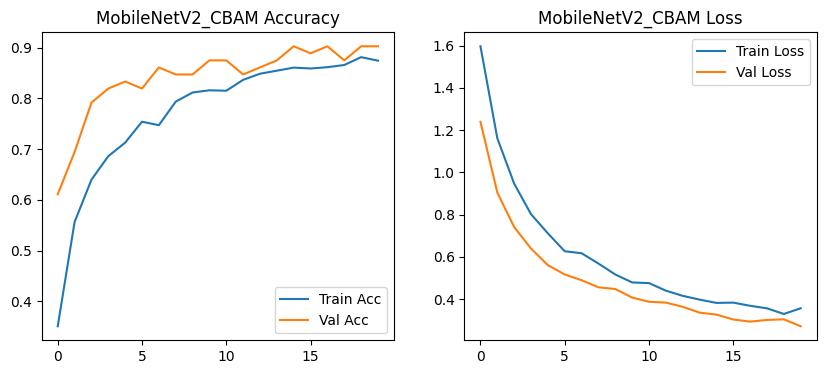

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 379ms/step
📊 Classification Report for MobileNetV2_CBAM
                     precision    recall  f1-score   support

Ph_alexandri_female       0.86      0.86      0.86        37
  Ph_alexandri_male       0.71      0.92      0.80        37
 Ph_papatasi_female       0.92      0.92      0.92        37
   Ph_papatasi_male       0.97      0.95      0.96        37
 Ph_sergenti_female       0.92      0.92      0.92        37
   Ph_sergenti_male       0.89      0.65      0.75        37

           accuracy                           0.87       222
          macro avg       0.88      0.87      0.87       222
       weighted avg       0.88      0.87      0.87       222



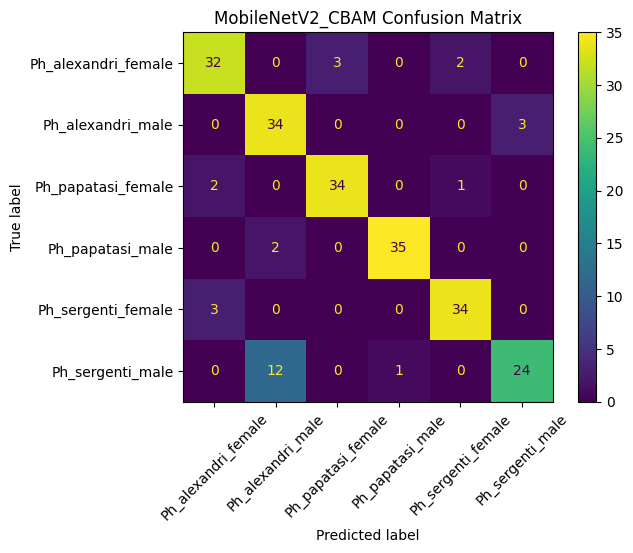

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Multiply, Reshape,
                                     Lambda, Add, Concatenate, Input, GlobalMaxPooling2D)
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# --- Dataset paths ---
dataset_source = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET"
train_path = f"{dataset_source}/train"
val_path = f"{dataset_source}/val"
test_path = f"{dataset_source}/test"

# --- Image parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Reduced batch size for memory efficiency

# --- Data generators ---
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = val_test_datagen.flow_from_directory(val_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_gen = val_test_datagen.flow_from_directory(test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# --- Global config ---
input_shape = (224, 224, 3)
num_classes = train_gen.num_classes

# --- CBAM Block Definition ---
def cbam_block(input_tensor, ratio=16):
    channel = K.int_shape(input_tensor)[-1]

    # Channel Attention
    avg_pool = GlobalAveragePooling2D()(input_tensor)
    max_pool = GlobalMaxPooling2D()(input_tensor)
    shared_dense = Dense(channel // ratio, activation='relu')
    avg_dense = shared_dense(avg_pool)
    max_dense = shared_dense(max_pool)
    channel_attention = Add()([avg_dense, max_dense])
    channel_attention = Dense(channel, activation='sigmoid')(channel_attention)
    channel_attention = Reshape((1, 1, channel))(channel_attention)
    channel_refined = Multiply()([input_tensor, channel_attention])

    # Spatial Attention
    avg_pool = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(channel_refined)
    max_pool = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(channel_refined)
    concat = Concatenate(axis=-1)([avg_pool, max_pool])
    spatial_attention = Conv2D(1, (7, 7), padding='same', activation='sigmoid')(concat)
    refined = Multiply()([channel_refined, spatial_attention])

    return refined

# --- MobileNetV2 Model with CBAM ---
def build_mobilenetv2_cbam():
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

    base_model.trainable = False  # Freeze base model layers

    x = base_model.output
    x = cbam_block(x)  # Apply CBAM after base model layers
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)

    model = Model(inputs=base_model.input, outputs=outputs, name="MobileNetV2_CBAM")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- Callbacks ---
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    ModelCheckpoint('best_model_mobilenetv2_cbam.h5', monitor='val_loss', save_best_only=True, verbose=1)  # Save best model
]

# --- Training the MobileNetV2_CBAM Model ---
history_dict = {}
model_predictions = {}
model_results = {}

# Train the MobileNetV2_CBAM model
print("\n🚀 Training MobileNetV2_CBAM for 20 epochs")
history = build_mobilenetv2_cbam().fit(train_gen, validation_data=val_gen, epochs=20, callbacks=callbacks)
history_dict["MobileNetV2_CBAM"] = history

# Save training history to CSV
pd.DataFrame(history.history).to_csv("MobileNetV2_CBAM_history.csv", index=False)

# Evaluate the model
print(f"✅ Evaluating MobileNetV2_CBAM")
loss, acc = history.model.evaluate(test_gen)
print(f"MobileNetV2_CBAM Test Accuracy: {acc * 100:.2f}%")
model_results["MobileNetV2_CBAM"] = acc

# Plot training/validation accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("MobileNetV2_CBAM Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MobileNetV2_CBAM Loss")
plt.legend()
plt.show()

# Classification Report and Confusion Matrix
preds = history.model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes
model_predictions["MobileNetV2_CBAM"] = preds

print(f"📊 Classification Report for MobileNetV2_CBAM")
print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(xticks_rotation=45)
plt.title("MobileNetV2_CBAM Confusion Matrix")
plt.show()


Found 1163 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 222 images belonging to 6 classes.

🚀 Training MobileNetV2_CBAM for 20 epochs


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.4233 - loss: 1.4436
Epoch 1: val_loss improved from inf to 0.81501, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 59s 545ms/step - accuracy: 0.4251 - loss: 1.4398 - val_accuracy: 0.6250 - val_loss: 0.8150 - learning_rate: 1.0000e-04
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7338 - loss: 0.7029
Epoch 2: val_loss improved from 0.81501 to 0.52206, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - accuracy: 0.7341 - loss: 0.7022 - val_accuracy: 0.7778 - val_loss: 0.5221 - learning_rate: 1.0000e-04
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7934 - loss: 0.5064
Epoch 3: val_loss improved from 0.52206 to 0.44721, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 289ms/step - accuracy: 0.7936 - loss: 0.5062 - val_accuracy: 0.8333 - val_loss: 0.4472 - learning_rate: 1.0000e-04
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.8546 - loss: 0.3760
Epoch 4: val_loss improved from 0.44721 to 0.41386, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 279ms/step - accuracy: 0.8546 - loss: 0.3760 - val_accuracy: 0.8611 - val_loss: 0.4139 - learning_rate: 1.0000e-04
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8716 - loss: 0.3722
Epoch 5: val_loss improved from 0.41386 to 0.25432, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - accuracy: 0.8717 - loss: 0.3718 - val_accuracy: 0.9167 - val_loss: 0.2543 - learning_rate: 1.0000e-04
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.8719 - loss: 0.3048
Epoch 6: val_loss improved from 0.25432 to 0.23819, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 31s 422ms/step - accuracy: 0.8722 - loss: 0.3046 - val_accuracy: 0.9306 - val_loss: 0.2382 - learning_rate: 1.0000e-04
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.9215 - loss: 0.2398
Epoch 7: val_loss improved from 0.23819 to 0.22922, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 27s 223ms/step - accuracy: 0.9214 - loss: 0.2399 - val_accuracy: 0.9306 - val_loss: 0.2292 - learning_rate: 1.0000e-04
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9098 - loss: 0.2684
Epoch 8: val_loss did not improve from 0.22922
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 231ms/step - accuracy: 0.9098 - loss: 0.2683 - val_accuracy: 0.9167 - val_loss: 0.2438 - learning_rate: 1.0000e-04
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.9406 - loss: 0.1993
Epoch 9: val_loss improved from 0.22922 to 0.13978, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - accuracy: 0.9405 - loss: 0.1994 - val_accuracy: 0.9444 - val_loss: 0.1398 - learning_rate: 1.0000e-04
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.9361 - loss: 0.2294
Epoch 10: val_loss improved from 0.13978 to 0.10149, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - accuracy: 0.9361 - loss: 0.2293 - val_accuracy: 0.9722 - val_loss: 0.1015 - learning_rate: 1.0000e-04
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9369 - loss: 0.1916
Epoch 11: val_loss did not improve from 0.10149
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - accuracy: 0.9370 - loss: 0.1913 - val_accuracy: 0.9444 - val_loss: 0.1686 - learning_rate: 1.0000e-04
Epoch 12/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9424 - loss: 0.1598
Epoch 12: val_loss did not improve from 0.10149
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - accuracy: 0.9424 - loss: 0.1598 - val_accuracy: 0.9028 - val_loss: 0.2956 - learning_rate: 1.0000e-04
Epoch 13/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.9442 - loss: 0.1755
Epoch 13: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 13: val_loss did not improve from 0.10149
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - accuracy: 0.9443 - loss: 0.1755 - v

73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.9439 - loss: 0.1741 - val_accuracy: 0.9722 - val_loss: 0.0985 - learning_rate: 5.0000e-05
Epoch 16/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9459 - loss: 0.1661
Epoch 16: val_loss improved from 0.09849 to 0.08453, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - accuracy: 0.9460 - loss: 0.1659 - val_accuracy: 0.9722 - val_loss: 0.0845 - learning_rate: 5.0000e-05
Epoch 17/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9618 - loss: 0.1371
Epoch 17: val_loss did not improve from 0.08453
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step - accuracy: 0.9618 - loss: 0.1372 - val_accuracy: 0.9722 - val_loss: 0.0871 - learning_rate: 5.0000e-05
Epoch 18/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9416 - loss: 0.1390
Epoch 18: val_loss improved from 0.08453 to 0.06598, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - accuracy: 0.9417 - loss: 0.1389 - val_accuracy: 0.9861 - val_loss: 0.0660 - learning_rate: 5.0000e-05
Epoch 19/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9569 - loss: 0.1256
Epoch 19: val_loss improved from 0.06598 to 0.05895, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - accuracy: 0.9569 - loss: 0.1257 - val_accuracy: 0.9861 - val_loss: 0.0590 - learning_rate: 5.0000e-05
Epoch 20/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9767 - loss: 0.1068
Epoch 20: val_loss improved from 0.05895 to 0.05581, saving model to best_model_mobilenetv2_cbam_finetuned.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 224ms/step - accuracy: 0.9766 - loss: 0.1070 - val_accuracy: 0.9861 - val_loss: 0.0558 - learning_rate: 5.0000e-05
✅ Evaluating MobileNetV2_CBAM_Finetuned
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.9667 - loss: 0.1296
MobileNetV2_CBAM_Finetuned Test Accuracy: 98.20%


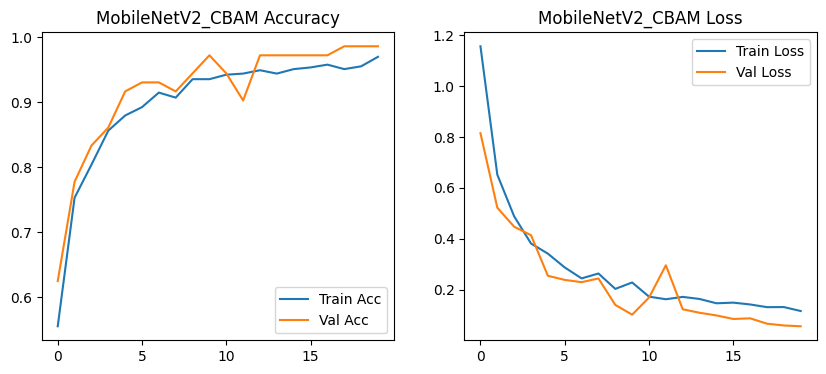

14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 332ms/step
📊 Classification Report for MobileNetV2_CBAM_Finetuned
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      0.95      0.97        37
  Ph_alexandri_male       0.97      1.00      0.99        37
 Ph_papatasi_female       1.00      0.97      0.99        37
   Ph_papatasi_male       1.00      1.00      1.00        37
 Ph_sergenti_female       0.93      1.00      0.96        37
   Ph_sergenti_male       1.00      0.97      0.99        37

           accuracy                           0.98       222
          macro avg       0.98      0.98      0.98       222
       weighted avg       0.98      0.98      0.98       222



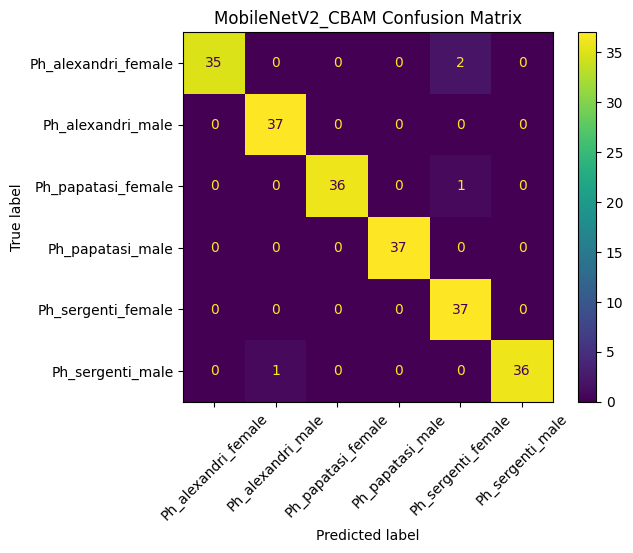

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Multiply, Reshape,
                                     Lambda, Add, Concatenate, Input, GlobalMaxPooling2D)
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# --- Dataset paths ---
dataset_source = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET"
train_path = f"{dataset_source}/train"
val_path = f"{dataset_source}/val"
test_path = f"{dataset_source}/test"

# --- Image parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Reduced batch size for memory efficiency

# --- Data generators with enhanced data augmentation ---
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.3,  # Increased width shift range
    height_shift_range=0.3,  # Increased height shift range
    zoom_range=0.3,  # Increased zoom range
    shear_range=0.2,  # Added shear range
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = val_test_datagen.flow_from_directory(val_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_gen = val_test_datagen.flow_from_directory(test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# --- Global config ---
input_shape = (224, 224, 3)
num_classes = train_gen.num_classes

# --- CBAM Block Definition ---
def cbam_block(input_tensor, ratio=16):
    channel = K.int_shape(input_tensor)[-1]

    # Channel Attention
    avg_pool = GlobalAveragePooling2D()(input_tensor)
    max_pool = GlobalMaxPooling2D()(input_tensor)
    shared_dense = Dense(channel // ratio, activation='relu')
    avg_dense = shared_dense(avg_pool)
    max_dense = shared_dense(max_pool)
    channel_attention = Add()([avg_dense, max_dense])
    channel_attention = Dense(channel, activation='sigmoid')(channel_attention)
    channel_attention = Reshape((1, 1, channel))(channel_attention)
    channel_refined = Multiply()([input_tensor, channel_attention])

    # Spatial Attention
    avg_pool = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(channel_refined)
    max_pool = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(channel_refined)
    concat = Concatenate(axis=-1)([avg_pool, max_pool])
    spatial_attention = Conv2D(1, (7, 7), padding='same', activation='sigmoid')(concat)
    refined = Multiply()([channel_refined, spatial_attention])

    return refined

# --- MobileNetV2 Model with CBAM --- Fine-tuned
def build_mobilenetv2_cbam_finetuned():
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

    base_model.trainable = True  # Unfreeze the entire model
    for layer in base_model.layers[:-20]:  # Optionally freeze the earlier layers
        layer.trainable = False

    x = base_model.output
    x = cbam_block(x)  # Apply CBAM after base model layers
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Adjusted dropout

    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)

    model = Model(inputs=base_model.input, outputs=outputs, name="MobileNetV2_CBAM_Finetuned")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- Callbacks ---
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    ModelCheckpoint('best_model_mobilenetv2_cbam_finetuned.h5', monitor='val_loss', save_best_only=True, verbose=1)  # Save best model
]

# --- Training the MobileNetV2_CBAM Model ---
history_dict = {}
model_predictions = {}
model_results = {}

# Train the MobileNetV2_CBAM model
print("\n🚀 Training MobileNetV2_CBAM for 20 epochs")
history = build_mobilenetv2_cbam_finetuned().fit(train_gen, validation_data=val_gen, epochs=20, callbacks=callbacks)
history_dict["MobileNetV2_CBAM_Finetuned"] = history

# Save training history to CSV
pd.DataFrame(history.history).to_csv("MobileNetV2_CBAM_Finetuned_history.csv", index=False)

# Evaluate the model
print(f"✅ Evaluating MobileNetV2_CBAM_Finetuned")
loss, acc = history.model.evaluate(test_gen)
print(f"MobileNetV2_CBAM_Finetuned Test Accuracy: {acc * 100:.2f}%")
model_results["MobileNetV2_CBAM_Finetuned"] = acc

# Plot training/validation accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("MobileNetV2_CBAM Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MobileNetV2_CBAM Loss")
plt.legend()
plt.show()

# Classification Report and Confusion Matrix
preds = history.model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes
model_predictions["MobileNetV2_CBAM_Finetuned"] = preds

print(f"📊 Classification Report for MobileNetV2_CBAM_Finetuned")
print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(xticks_rotation=45)
plt.title("MobileNetV2_CBAM Confusion Matrix")
plt.show()


# Explainable AI (XAI)

In [ ]:
!pip install torchvision torch pytorch-grad-cam
!pip install grad-cam
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM # this should now work
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

ERROR: Could not find a version that satisfies the requirement pytorch-grad-cam (from versions: none)
ERROR: No matching distribution found for pytorch-grad-cam


In [ ]:
# Path to your dataset (replace with your actual path in Google Drive)
img_folder = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET'
infected_folder = img_folder + '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/Ph_alexandri_male'
non_infected_folder = img_folder + '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/Ph_alexandri_female' #Fixed typo: changed 'non_infected' to 'non-infected'

In [ ]:
import os
img_paths = []
labels = []

In [ ]:
import os

train_folder = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/train"

# List the contents of the train folder
print(os.listdir(train_folder))


['Ph_sergenti_female', 'Ph_papatasi_male', 'Ph_papatasi_female', 'Ph_alexandri_male', 'Ph_sergenti_male', 'Ph_alexandri_female']


In [ ]:
import os

# Path to the train folder
train_folder = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/train"

img_paths = []
labels = []

# Define class labels based on subfolders
class_names = ['Ph_sergenti_female', 'Ph_papatasi_male', 'Ph_papatasi_female', 'Ph_alexandri_male', 'Ph_sergenti_male', 'Ph_alexandri_female']

# Loop through each class folder
for class_index, class_name in enumerate(class_names):
    class_folder = os.path.join(train_folder, class_name)

    # Collect images for each class
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)

        if os.path.isfile(img_path):  # Ensure the file exists
            img_paths.append(img_path)
            labels.append(class_index)  # Label each image with the corresponding class index

# Print the total number of images collected
print(f"Total images: {len(img_paths)}")


Total images: 1163


In [ ]:
# Define the MedicalDataset class
class MedicalDataset(Dataset):
    def __init__(self, img_paths, labels, transform=None):
        self.img_paths = img_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB') # Ensure the image is loaded as RGB
        if self.transform:
            image = self.transform(image)
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
# Create dataset and dataloader
dataset = MedicalDataset(img_paths, labels, transform=transform)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)
# Load DenseNet201 pre-trained model
model = models.densenet201(pretrained=True)

# Replace the classifier layer to fit your number of classes
model.classifier = nn.Linear(1920, 2)  # Assuming binary classification (infected vs non-infected)

# Move the model to the appropriate device (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 180MB/s]


In [ ]:
# Define the MedicalDataset class
class MedicalDataset(Dataset):
    def __init__(self, img_paths, labels, transform=None):
        self.img_paths = img_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        label = self.labels[idx]

        try:  # Check for loading errors
            image = Image.open(img_path).convert('RGB')  # Ensure the image is loaded as RGB
            if self.transform:
                image = self.transform(image)
        except (IOError, SyntaxError, RuntimeError) as e:  # Include RuntimeError in exception handling
            print(f"Skipping invalid image: {img_path} due to error: {e}")
            # Option 1: return a default or blank image with a negative label
            # Option 2: raise an exception to drop the image completely
            # You chose Option 1: return a default image
            return Image.new('RGB', (224, 224)), -1

        return image, label  # Return the image and label


In [ ]:
# Define the MedicalDataset class
class MedicalDataset(Dataset):
    def __init__(self, img_paths, labels, transform=None):
        self.img_paths = img_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]

        try:  # Check for loading errors
            image = Image.open(img_path).convert('RGB')  # Ensure the image is loaded as RGB
            if self.transform:
                image = self.transform(image)
            label = self.labels[idx]  # Get the label after successful image loading
        except (IOError, SyntaxError, RuntimeError) as e:  # Include RuntimeError in exception handling
            print(f"Skipping invalid image: {img_path} due to error: {e}")
            # Return a default image and a negative label
            return Image.new('RGB', (224, 224)), -1

        return image, label  # Return the image and label

In [ ]:
# Apply Grad-CAM
target_layers = [model.features.denseblock4]  # Select the target layer to visualize

# Remove use_cuda argument
cam = GradCAM(model=model, target_layers=target_layers)

In [ ]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import os

# Path to your test image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/Ph_alexandri_male/107.jpg'

# Load the image and apply necessary transformations
img = Image.open(image_path).convert('RGB')

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for EfficientNetV2
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ImageNet
])

# Apply transformations to the image
input_tensor = transform(img).unsqueeze(0)  # Add batch dimension (1, 3, 224, 224)
print(f"Input tensor shape before moving to device: {input_tensor.shape}")

# Temporarily switch to CPU for debugging
device = torch.device("cpu")
input_tensor = input_tensor.to(device)

# Make sure the model is on the correct device as well
model = model.to(device)

# Print the model device to check compatibility
print(f"Model is on device: {next(model.parameters()).device}")

# Perform inference
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation for inference
    outputs = model(input_tensor)

# Get the predicted class
_, predicted_class = torch.max(outputs, 1)
print(f"Predicted class: {predicted_class.item()}")


Input tensor shape before moving to device: torch.Size([1, 3, 224, 224])
Model is on device: cpu
Predicted class: 4


In [ ]:
# Assuming you have a dictionary that maps class indices to class names
class_names = {
    0: 'Ph_alexandri_female',
    1: 'Ph_alexandri_male',
    2: 'Ph_papatasi_female',
    3: 'Ph_papatasi_male',
    4: 'Ph_sergenti_female',
    5: 'Ph_sergenti_male'
}

# Get the class name corresponding to the predicted index
predicted_class_name = class_names[predicted_class.item()]
print(f"Predicted class name: {predicted_class_name}")


Predicted class name: Ph_sergenti_female


In [ ]:
# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Assuming label 1 corresponds to 'infected'
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)


In [ ]:
# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))

# Convert the image to the correct data type and number of channels
img_np = np.array(img)
if len(img_np.shape) == 2:  # Grayscale image
    img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2BGR)

# Normalize the image to be in the range [0, 255] and ensure it's uint8
img_np = np.uint8(255 * img_np / np.max(img_np))

# Ensure grayscale_cam is in the correct format (CV_8UC1)
if len(grayscale_cam.shape) == 3:
    grayscale_cam = grayscale_cam[:, :, 0] #If grayscale_cam has more than one channel, take the first one.
grayscale_cam = np.uint8(255 * grayscale_cam)

# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam, use_rgb=True)

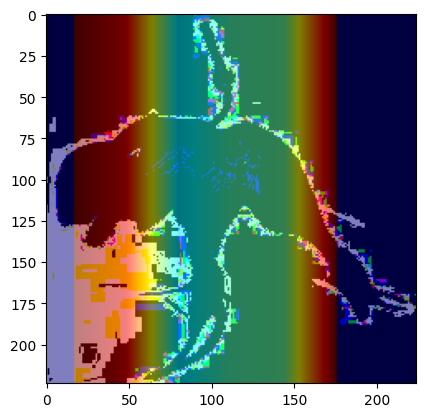

In [ ]:
# Display the result
plt.imshow(cam_image)
plt.show()

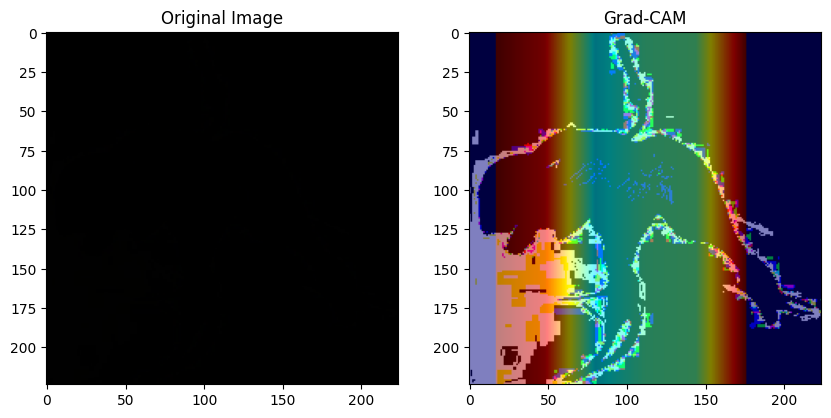

In [ ]:
# 8. Display the original image and the Grad-CAM overlay
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np) # Changed image_np to img_np

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cam_image)

plt.show()

In [ ]:
# Test the model on a new image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/Ph_alexandri_female/15.jpg'  # Your test image
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

In [ ]:
# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Assuming label 1 corresponds to 'infected'
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))
img_np = np.array(img) / 255.0

# Ensure grayscale_cam has the correct number of channels
if len(grayscale_cam.shape) == 2:
    grayscale_cam = grayscale_cam[..., np.newaxis]


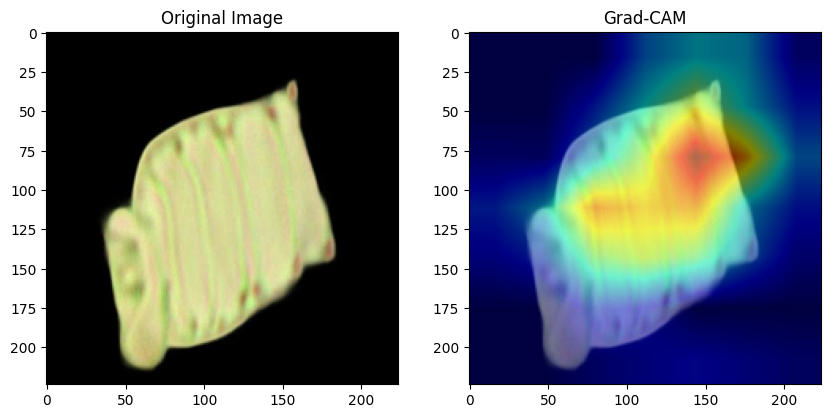

In [ ]:
# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam[0, :], use_rgb=True)

# 8. Display the original image and the Grad-CAM overlay
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cam_image)

plt.show()

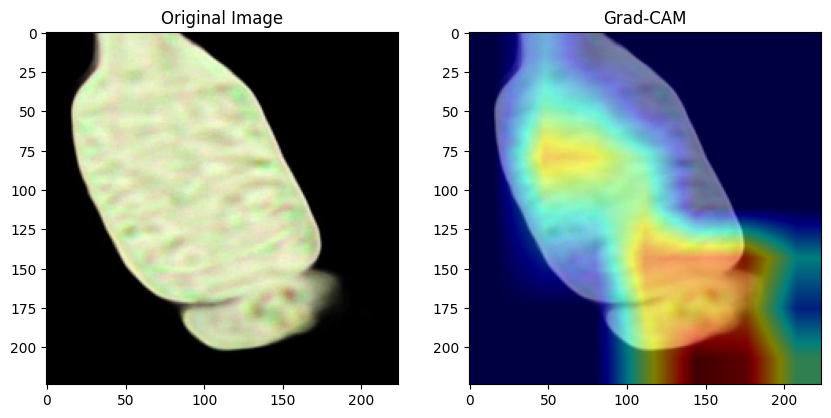

In [ ]:
# Test the model on a new image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/Ph_alexandri_female/86.jpg'  # Your test image
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Assuming label 1 corresponds to 'infected'
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))
img_np = np.array(img) / 255.0

# Ensure grayscale_cam has the correct number of channels
if len(grayscale_cam.shape) == 2:
    grayscale_cam = grayscale_cam[..., np.newaxis]

# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam[0, :], use_rgb=True)

# 8. Display the original image and the Grad-CAM overlay
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cam_image)

plt.show()

In [ ]:
!pip install pytorch-gradcam
!pip install pytorch-grad-cam # Correct package name is 'pytorch-grad-cam'

ERROR: Could not find a version that satisfies the requirement pytorch-grad-cam (from versions: none)
ERROR: No matching distribution found for pytorch-grad-cam


In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.3 MB/s 

# ScoreCAM

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 120/120 [09:39<00:00,  4.83s/it]


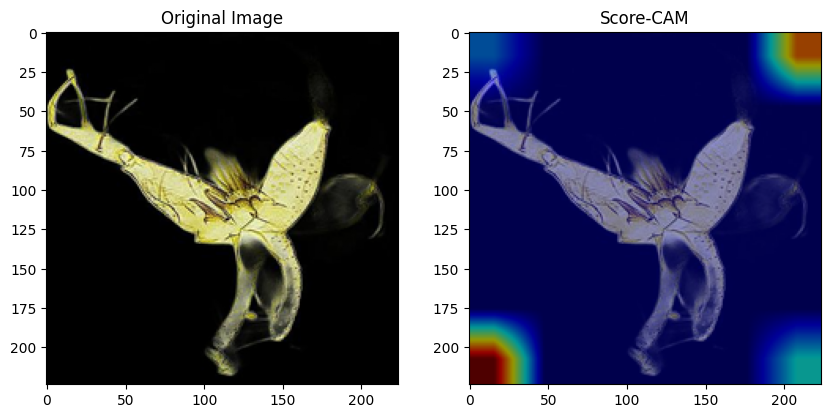

In [ ]:
import torchvision.transforms as transforms #import transforms module
import torchvision.transforms as transforms #import transforms module

from pytorch_grad_cam import ScoreCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
# Import ClassifierOutputTarget
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch  # Import the 'torch' module
import torchvision.models as models  # Import the 'models' module to load pre-trained models

# Define the device (CPU or CUDA) before using it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the transformation pipeline for

from pytorch_grad_cam import ScoreCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ... your existing code for model loading, transform, and device ...

# Load a pre-trained DenseNet201 model (or replace with your model)
model = models.densenet201(pretrained=True)

# Define the transformation pipeline for the input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224 (for EfficientNetV2)
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize to ImageNet mean and std
])

# Test the model on a new image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_alexandri_male/157.jpg'  # Your test image
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# Initialize Score-CAM
target_layers = [model.features.denseblock4]  # Select the target layer to visualize (adjust for your model)
cam = ScoreCAM(model=model, target_layers=target_layers) # Replace model and target_layers

# Generate CAM
targets = [ClassifierOutputTarget(1)]  # Assuming label 1 corresponds to 'infected'
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Resize the original image to match the CAM dimensions
img = img.resize((224, 224))
img_np = np.array(img) / 255.0

# Ensure grayscale_cam has the correct number of channels
if len(grayscale_cam.shape) == 2:
    grayscale_cam = grayscale_cam[..., np.newaxis]

# Generate CAM
cam_image = show_cam_on_image(img_np, grayscale_cam[0, :], use_rgb=True)

# Display the original image and the Score-CAM overlay
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('Score-CAM')
plt.imshow(cam_image)
plt.show()

# GradCAMPlusPlus

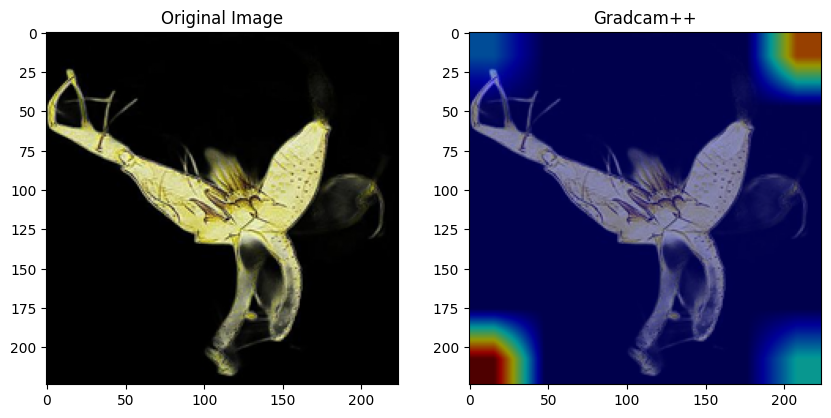

In [ ]:
!pip install pytorch-gradcam

from pytorch_grad_cam import GradCAMPlusPlus
from pytorch_grad_cam.utils.image import show_cam_on_image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ... your existing code for model loading, transform, and device ...

# Test the model on a new image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_alexandri_male/aug_048.jpg'
img = Image.open(image_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# Initialize GradCAM++
cam = GradCAMPlusPlus(model=model, target_layers=target_layers)

# Generate CAM
targets = [ClassifierOutputTarget(1)]
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# ... (Resize, handle channels, and visualize as in the previous example) ...
# Display the original
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('Gradcam++')
plt.imshow(cam_image)
plt.show()

# XGradCAM

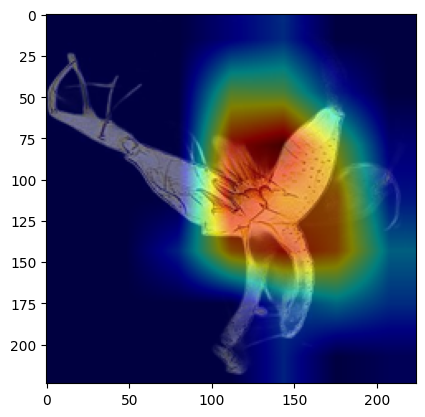

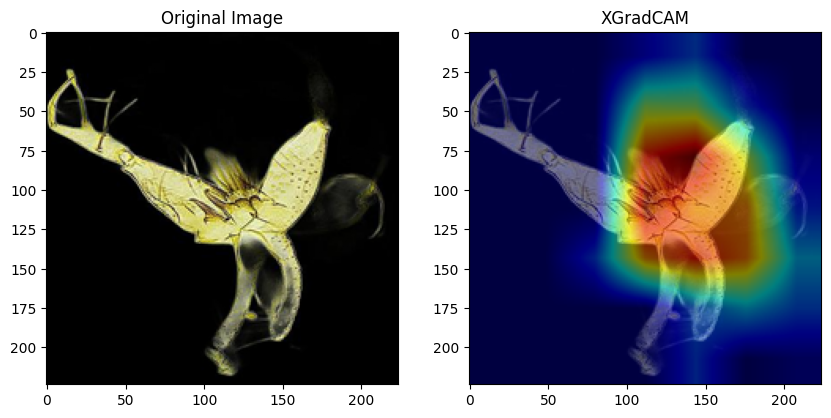

In [ ]:
from pytorch_grad_cam import XGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# Initialize XGrad-CAM
cam = XGradCAM(model=model, target_layers=target_layers)

# Generate the heatmap
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Visualize
cam_image = show_cam_on_image(img_np, grayscale_cam[0], use_rgb=True)
plt.imshow(cam_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('XGradCAM')
plt.imshow(cam_image)
plt.show()

# EigenCAM

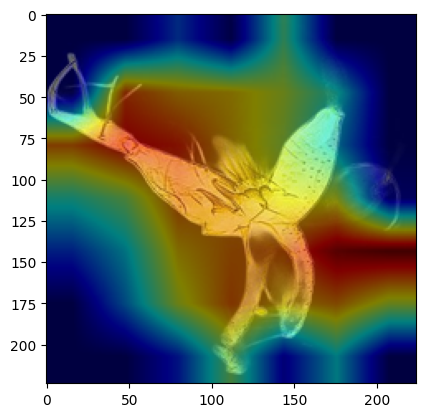

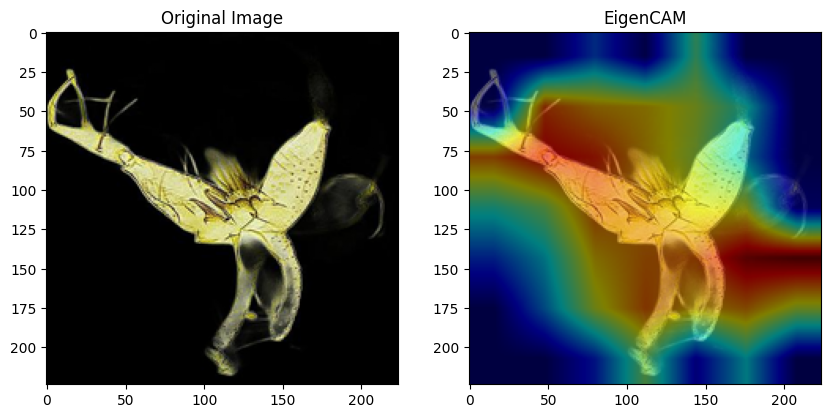

In [ ]:
from pytorch_grad_cam import EigenCAM

# Initialize EigenCAM
cam = EigenCAM(model=model, target_layers=target_layers)

# Generate the heatmap
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Visualize
cam_image = show_cam_on_image(img_np, grayscale_cam[0], use_rgb=True)
plt.imshow(cam_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('EigenCAM')
plt.imshow(cam_image)
plt.show()


# LayerCAM

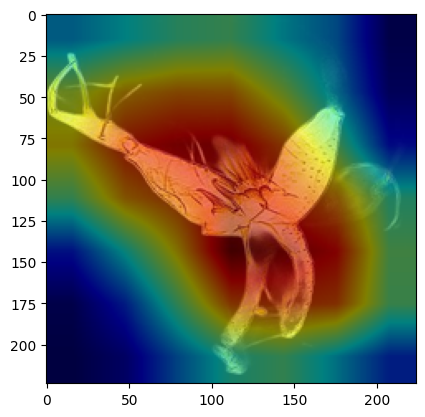

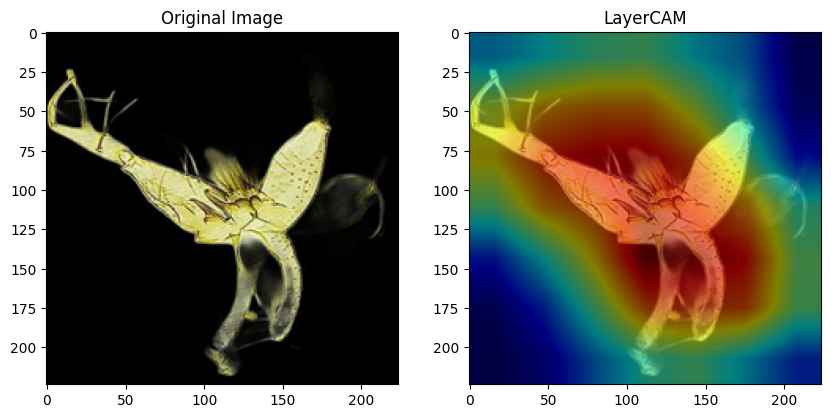

In [ ]:
from pytorch_grad_cam import LayerCAM

# Initialize LayerCAM
cam = LayerCAM(model=model, target_layers=target_layers)

# Generate the heatmap
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Visualize
cam_image = show_cam_on_image(img_np, grayscale_cam[0], use_rgb=True)
plt.imshow(cam_image)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('LayerCAM')
plt.imshow(cam_image)
plt.show()


# Full-Gradient / FullGrad

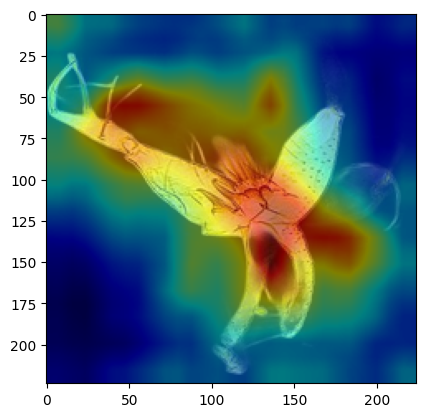

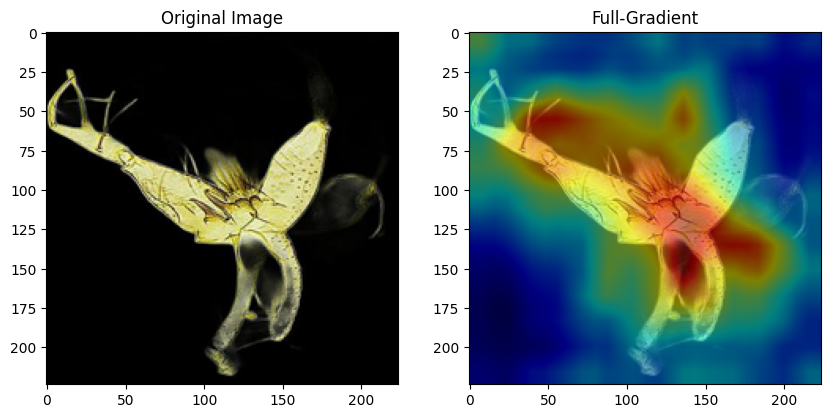

In [ ]:
from pytorch_grad_cam import FullGrad

# Initialize Full-Gradient with target layers
cam = FullGrad(model=model, target_layers=target_layers)

# Generate the heatmap
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Visualize
cam_image = show_cam_on_image(img_np, grayscale_cam[0], use_rgb=True)
plt.imshow(cam_image)
plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('Full-Gradient')
plt.imshow(cam_image)
plt.show()

# Thresholded CAM (Binary Mask)

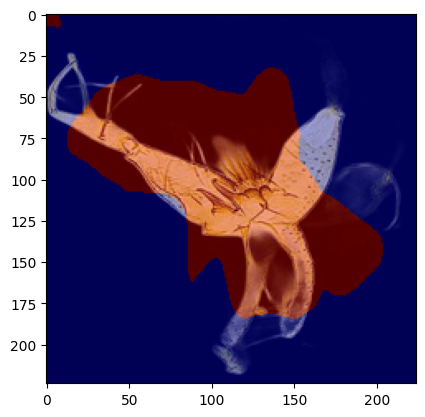

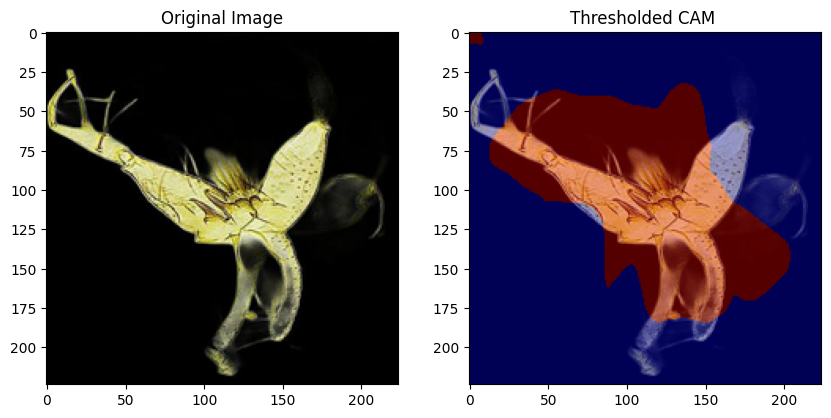

In [ ]:
# Generate CAM (using any method, e.g., AblationCAM, GradCAM)
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Apply a threshold to binarize the heatmap (e.g., threshold at 0.5)
threshold = 0.5
binary_cam = (grayscale_cam[0] > threshold).astype(float)

# Visualize the binary heatmap
cam_image = show_cam_on_image(img_np, binary_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)
plt.subplot(1, 2, 2)
plt.title('Thresholded CAM ')
plt.imshow(cam_image)
plt.show()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/1000 [00:00<?, ?it/s]

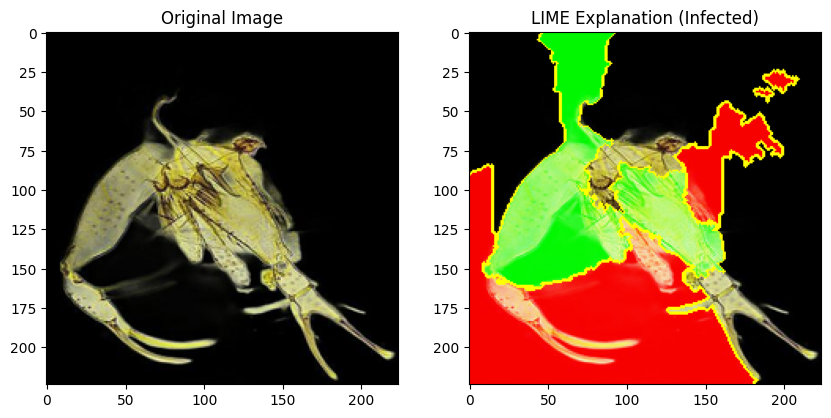

In [ ]:
import torch
from lime import lime_image
from skimage.segmentation import mark_boundaries
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms #import transforms module
import torchvision.models as models # Import torchvision.models

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and preprocess the image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_alexandri_male/aug_166.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))  # Assuming your model expects 224x224 input
img_np = np.array(img)

# Define the transformation pipeline for
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for EfficientNetV2
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ImageNet
])

# Load your pre-trained model (example using DenseNet201)
model = models.densenet201(pretrained=True)
# Assuming binary classification (infected vs non-infected)
num_classes = 2  # Replace with the actual number of classes in your task
model.classifier = torch.nn.Linear(in_features=model.classifier.in_features, out_features=num_classes)
model = model.to(device) # Move the model to the appropriate device


# Convert the image to a format the model can accept
input_tensor = transform(img).unsqueeze(0).to(device)

# Define a prediction function that returns model output probabilities
def predict_fn(images):
    # Convert images to tensors and pass through the model
    inputs = [transform(Image.fromarray(image)).unsqueeze(0).to(device) for image in images]
    inputs = torch.cat(inputs, dim=0)
    with torch.no_grad():
        outputs = model(inputs)  # Assuming your model variable is named `model`
    return outputs.cpu().numpy()

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Get LIME explanation
explanation = explainer.explain_instance(img_np,
                                         classifier_fn=predict_fn,
                                         top_labels=2,
                                         hide_color=0,
                                         num_samples=1000)

# Show explanation for class label 1 (infected)
temp, mask = explanation.get_image_and_mask(label=1, positive_only=False, num_features=10, hide_rest=False)

# Display the LIME result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('LIME Explanation (Infected)')
plt.imshow(mark_boundaries(temp, mask))

plt.show()

In [ ]:
import shap
import numpy as np
import torch
from PIL import Image
import torchvision.transforms as transforms
import torch.nn as nn
import torchvision.models as models

# Preprocessing the image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_papatasi_female/191.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))

# Define the transformation pipeline for input image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard ImageNet normalization
])

img_np = np.array(img) / 255.0  # Prepare image for visualization
input_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension

# Function to replace in-place ReLU layers with out-of-place ReLU
def replace_inplace_relu(model):
    for name, module in model.named_modules():
        if isinstance(module, torch.nn.ReLU):
            module.inplace = False  # Disable in-place modification for ReLU layers
    return model

# Assuming your model is already defined and trained, e.g., using EfficientNet, ResNet, etc.
model_for_shap = models.resnet50(weights='IMAGENET1K_V1')  # Replace with your actual model
model_for_shap = replace_inplace_relu(model_for_shap)

model_for_shap.eval()  # Set the model to evaluation mode
model_for_shap.to(device)  # Move model to device (CPU or GPU)

# Clone the input tensor before passing to SHAP (important to avoid in-place issues)
input_tensor_copy = input_tensor.clone().detach()

# Initialize SHAP explainer with the model and input tensor copy
explainer = shap.DeepExplainer(model_for_shap, input_tensor_copy)

# Get SHAP values for the input image
shap_values = explainer.shap_values(input_tensor_copy)

# Visualize SHAP explanation
shap.image_plot(shap_values, np.array([img_np]))


RuntimeError: Output 0 of BackwardHookFunctionBackward is a view and is being modified inplace. This view was created inside a custom Function (or because an input was returned as-is) and the autograd logic to handle view+inplace would override the custom backward associated with the custom Function, leading to incorrect gradients. This behavior is forbidden. You can fix this by cloning the output of the custom Function.

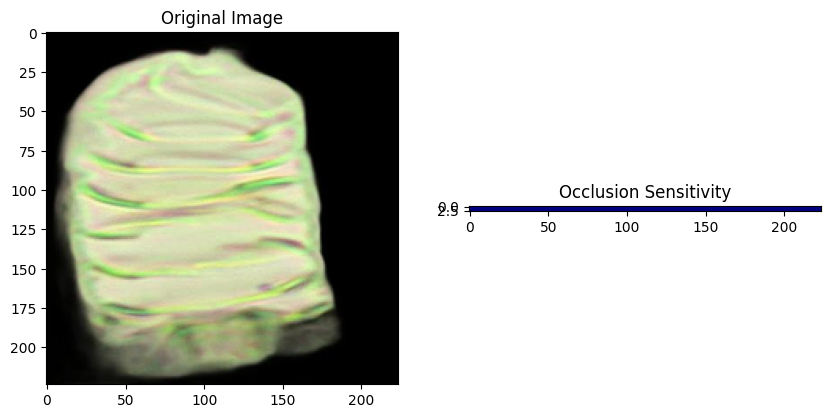

In [ ]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_papatasi_female/191.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))
img_np = np.array(img) / 255.0
input_tensor = transform(img).unsqueeze(0).to(device)

# Function to apply occlusion
def apply_occlusion(image, size=32, stride=8):
    heatmap = np.zeros((image.shape[1], image.shape[2]))
    for y in range(0, image.shape[1] - size + 1, stride):
        for x in range(0, image.shape[2] - size + 1, stride):
            occluded_image = image.clone()
            occluded_image[:, :, y:y+size, x:x+size] = 0  # Mask out a patch
            output = model(occluded_image).squeeze()
            heatmap[y:y+size, x:x+size] = output[1].item()  # Assuming label 1 is 'infected'
    return heatmap

# Generate occlusion heatmap
occlusion_heatmap = apply_occlusion(input_tensor)

# Visualize the occlusion sensitivity map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('Occlusion Sensitivity')
plt.imshow(occlusion_heatmap, cmap='jet')
plt.show()

In [ ]:
!pip install captum

In [ ]:
import torch
from captum.attr import IntegratedGradients
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms #import transforms module

# Load and preprocess the image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_papatasi_female/191.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))
img_np = np.array(img) / 255.0

# Define the transformation pipeline for input image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard ImageNet normalization
])

input_tensor = transform(img).unsqueeze(0).to(device)

# **Replace in-place ReLU layers with out-of-place ReLU**
def replace_inplace_relu(model):
    for name, module in model.named_modules():
        if isinstance(module, torch.nn.ReLU):
            module.inplace = False  # Disable in-place modification for ReLU layers
    return model

# Assuming 'model' is already defined and trained
model = replace_inplace_relu(model)  # Apply the function to your model

# Integrated Gradients explainer
ig = IntegratedGradients(model)
attributions = ig.attribute(input_tensor, target=1)  # Assuming label 1 is 'infected'
attributions = attributions.squeeze().cpu().detach().numpy()

# Normalize attributions for visualization
attributions = np.sum(np.abs(attributions), axis=0)
attributions = (attributions - np.min(attributions)) / (np.max(attributions) - np.min(attributions))

# Plot Integrated Gradients
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('Integrated Gradients')
plt.imshow(attributions, cmap='hot')
plt.show()

NameError: name 'device' is not defined

In [ ]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to add noise to the image
def add_noise(image, noise_level=0.1):
    noise = noise_level * torch.randn_like(image).to(device)
    return image + noise

# Function to compute gradients with noise (SmoothGrad)
def smoothgrad(input_tensor, n_samples=50, noise_level=0.1):
    smoothed_grad = torch.zeros_like(input_tensor)
    for i in range(n_samples):
        noisy_input = add_noise(input_tensor, noise_level)
        noisy_input.requires_grad = True
        output = model(noisy_input).squeeze()[1]  # Assuming label 1 is 'infected'
        output.backward()
        smoothed_grad += noisy_input.grad.abs()
    return smoothed_grad / n_samples

# Load and preprocess the image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_papatasi_female/191.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))
img_np = np.array(img) / 255.0
input_tensor = transform(img).unsqueeze(0).to(device)

# Generate SmoothGrad explanation
smoothed_grad = smoothgrad(input_tensor).squeeze().cpu().detach().numpy()

# Normalize for visualization
smoothed_grad = np.sum(np.abs(smoothed_grad), axis=0)
smoothed_grad = (smoothed_grad - np.min(smoothed_grad)) / (np.max(smoothed_grad) - np.min(smoothed_grad))

# Plot SmoothGrad explanation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('SmoothGrad')
plt.imshow(smoothed_grad, cmap='hot')
plt.show()

NameError: name 'transform' is not defined

In [ ]:
from captum.attr import GuidedBackprop
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_papatasi_female/191.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))
img_np = np.array(img) / 255.0
input_tensor = transform(img).unsqueeze(0).to(device)

# Guided Backpropagation explainer
guided_bp = GuidedBackprop(model)
attributions = guided_bp.attribute(input_tensor, target=1)  # Assuming label 1 is 'infected'

# Convert attributions to numpy
attributions = attributions.squeeze().cpu().detach().numpy()
attributions = np.sum(attributions, axis=0)  # Summing channels
attributions = np.maximum(attributions, 0)  # ReLU to remove negative values
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())  # Normalize

# Visualize Guided Backpropagation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('Guided Backpropagation')
plt.imshow(attributions, cmap='hot')
plt.show()

NameError: name 'transform' is not defined

In [ ]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_papatasi_female/191.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))
img_np = np.array(img) / 255.0
input_tensor = transform(img).unsqueeze(0).to(device)

# Forward pass and scoring
with torch.no_grad():
    model.eval()
    output = model(input_tensor)
    output_score = output[0, 1].item()  # Get the score for 'infected' label

# Create a simple scoring mechanism based on feature importance
def score_features(input_tensor, score_function):
    scores = np.zeros(input_tensor.shape[-2:])
    for y in range(input_tensor.shape[-2]):
        for x in range(input_tensor.shape[-1]):
            perturbed_input = input_tensor.clone()
            perturbed_input[:, :, y, x] = 0  # Zero out the pixel (perturbation)
            perturbed_output = model(perturbed_input)[0, 1].item()
            scores[y, x] = output_score - perturbed_output  # Score is the difference in output
    return scores

# Compute feature scores using SBE
scores = score_features(input_tensor, output_score)

# Normalize for visualization
scores = (scores - scores.min()) / (scores.max() - scores.min())

# Visualize SBE heatmap
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('SBE Heatmap')
plt.imshow(scores, cmap='hot')
plt.show()

NameError: name 'transform' is not defined

In [ ]:
from captum.attr import DeepLift
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_papatasi_female/191.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))
img_np = np.array(img) / 255.0
input_tensor = transform(img).unsqueeze(0).to(device)

# DeepLIFT explainer
deeplift = DeepLift(model)
attributions = deeplift.attribute(input_tensor, target=1)  # Assuming label 1 is 'infected'

# Normalize attributions for visualization
attributions = attributions.squeeze().cpu().detach().numpy()
attributions = np.sum(attributions, axis=0)  # Summing channels
attributions = (attributions - np.min(attributions)) / (np.max(attributions) - np.min(attributions))

# Visualize DeepLIFT attributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('DeepLIFT Attributions')
plt.imshow(attributions, cmap='hot')
plt.show()


In [ ]:

import torch
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_papatasi_female/191.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))
img_np = np.array(img) / 255.0
input_tensor = transform(img).unsqueeze(0).to(device)

# Function to apply perturbation (Gaussian Blur)
def apply_perturbation(img_np, patch_size=32, stride=8):
    perturbed_img = img.copy()
    for y in range(0, img_np.shape[0] - patch_size + 1, stride):
        for x in range(0, img_np.shape[1] - patch_size + 1, stride):
            patch = img.crop((x, y, x + patch_size, y + patch_size))
            blurred_patch = patch.filter(ImageFilter.GaussianBlur(radius=5))
            perturbed_img.paste(blurred_patch, (x, y))
    return np.array(perturbed_img) / 255.0

# Generate Perturbation-Based Saliency Map
perturbed_img_np = apply_perturbation(img_np)

# Visualize Perturbation-Based Saliency Map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_np)

plt.subplot(1, 2, 2)
plt.title('Perturbation-Based Saliency Map')
plt.imshow(perturbed_img_np)
plt.show()
